In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [78]:
# Import data
data = pd.read_csv('data_train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Analyse data
#--- exemple ---
data.head(5)


,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [80]:
data.shape

(47276, 23)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            47276 non-null  int64  
 1   Diabetes_012          47276 non-null  int64  
 2   HighBP                47276 non-null  int64  
 3   HighChol              47276 non-null  float64
 4   CholCheck             47276 non-null  int64  
 5   BMI                   47276 non-null  float64
 6   Smoker                47276 non-null  float64
 7   Stroke                47276 non-null  float64
 8   HeartDiseaseorAttack  47276 non-null  float64
 9   PhysActivity          47276 non-null  int64  
 10  Fruits                47276 non-null  int64  
 11  Veggies               47276 non-null  int64  
 12  HvyAlcoholConsump     47276 non-null  int64  
 13  AnyHealthcare         47276 non-null  int64  
 14  NoDocbcCost           47276 non-null  float64
 15  GenHlth            

In [82]:
data.isnull().sum()

Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [83]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
47271    False
47272    False
47273    False
47274    False
47275    False
Length: 47276, dtype: bool

In [84]:
data.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, 'Unnamed: 0'),
  Text(0, 1.5, 'Diabetes_012'),
  Text(0, 2.5, 'HighBP'),
  Text(0, 3.5, 'HighChol'),
  Text(0, 4.5, 'CholCheck'),
  Text(0, 5.5, 'BMI'),
  Text(0, 6.5, 'Smoker'),
  Text(0, 7.5, 'Stroke'),
  Text(0, 8.5, 'HeartDiseaseorAttack'),
  Text(0, 9.5, 'PhysActivity'),
  Text(0, 10.5, 'Fruits'),
  Text(0, 11.5, 'Veggies'),
  Text(0, 12.5, 'HvyAlcoholConsump'),
  Text(0, 13.5, 'AnyHealthcare'),
  Text(0, 14.5, 'NoDocbcCost'),
  Text(0, 15.5, 'GenHlth'),
  Text(0, 16.5, 'MentHlth'),
  Text(0, 17.5, 'PhysHlth'),
  Text(0, 18.5, 'DiffWalk'),
  Text(0, 19.5, 'Sex'),
  Text(0, 20.5, 'Age'),
  Text(0, 21.5, 'Education'),
  Text(0, 22.5, 'Income')])

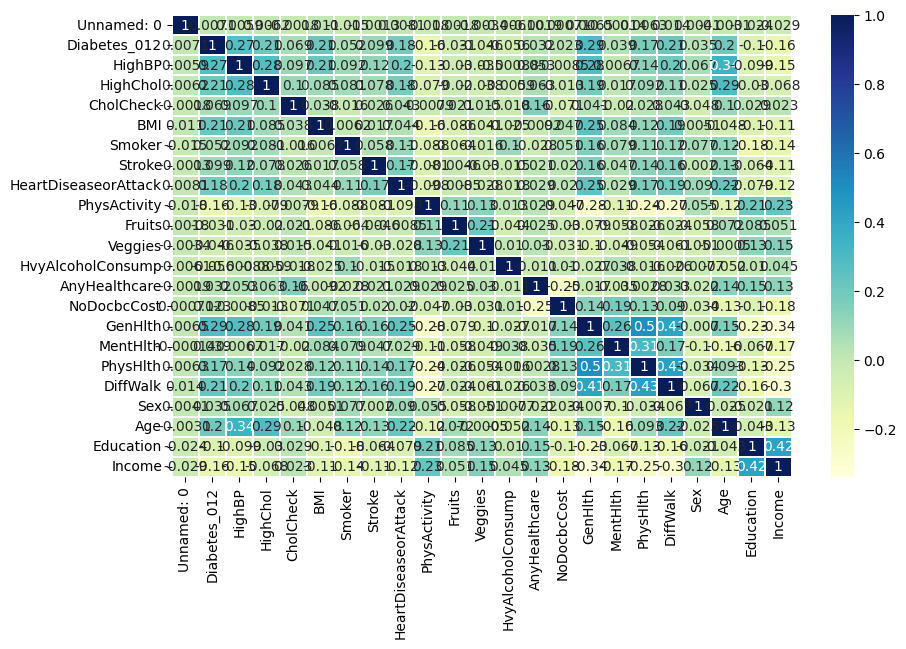

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

Text(0, 0.5, 'Count')

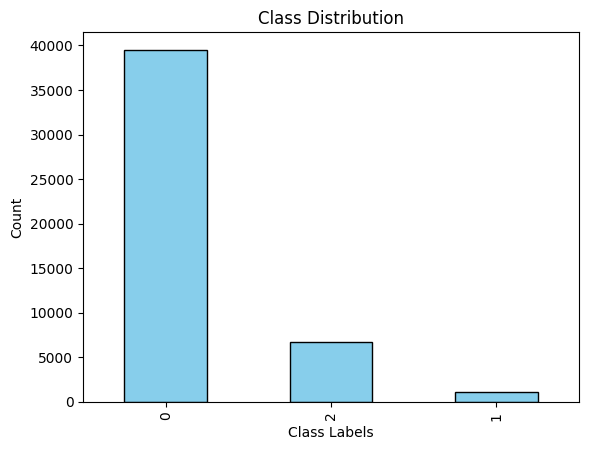

In [76]:
y.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Count')


In [86]:
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

GaussianNB()

In [87]:
# Predict on test data
pred = clf.predict(X_test)

In [88]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7899
           1       0.00      0.00      0.00       220
           2       0.31      0.21      0.25      1337

    accuracy                           0.80      9456
   macro avg       0.39      0.38      0.38      9456
weighted avg       0.76      0.80      0.78      9456


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Export model
pickle.dump(clf, open("classification_model.pkl", "wb"))